In [1]:
# import nessesary library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Regression Algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


In [2]:
df=pd.read_csv('data/quikr_car - quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
df.size

5352

In [5]:
df['company'].value_counts()

company
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: count, dtype: int64

In [6]:
df[df['company']=='Nissan']

,name,company,year,Price,kms_driven,fuel_type
126,Nissan Micra XV,Nissan,2011,"1,79,000","41,000 kms",Petrol
149,Nissan Sunny,Nissan,2012,"2,24,999","45,000 kms",Petrol
270,Nissan Terrano XL D Plus,Nissan,2015,"4,99,999","60,000 kms",Diesel
427,Nissan X Trail Select Variant,Nissan,2019,"12,00,000",300 kms,Diesel
637,Nissan Sunny XL,Nissan,2011,"2,30,000","52,000 kms",Petrol
748,Nissan Micra XL,Nissan,2017,"4,30,000","62,500 kms",Diesel


In [14]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [13]:
df=df.dropna()

In [15]:

df[df['year'].str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [17]:
# get a backup copy of the car data
backup=df.copy()

Data Cleaning

In [18]:
df=df[df['Price']!='Ask For Price']

In [19]:
df['Price']=df['Price'].str.replace(',','').astype('int')

In [20]:
df=df[df['year'].str.isnumeric()]

In [21]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [22]:
df=df[df['kms_driven']!='Petrol']

In [23]:
df['kms_driven']=df['kms_driven'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [25]:
df['year']=df['year'].astype('int')

In [26]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [27]:
df=df[~df['fuel_type'].isna()]

C:\Users\Hp\AppData\Local\Temp\ipykernel_14632\2056639263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company',data=df,palette='viridis')


<Axes: xlabel='company', ylabel='count'>

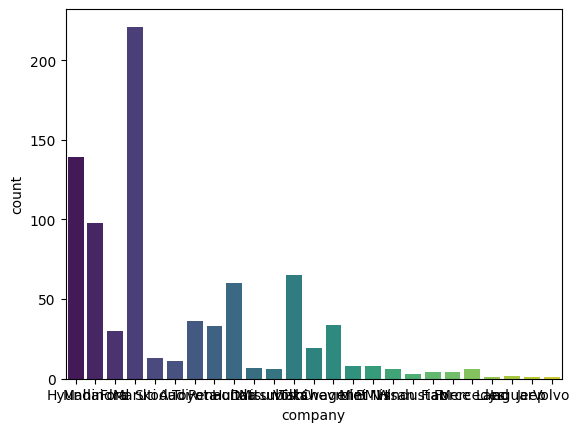

In [28]:
sns.countplot(x='company',data=df,palette='viridis')

<Axes: xlabel='fuel_type'>

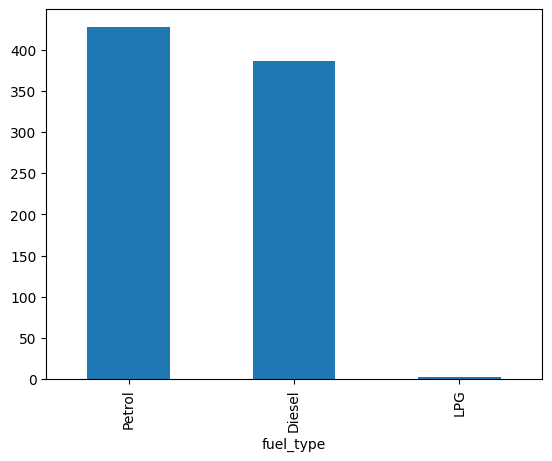

In [29]:
df['fuel_type'].value_counts().plot(kind='bar')

<Axes: xlabel='Price', ylabel='Count'>

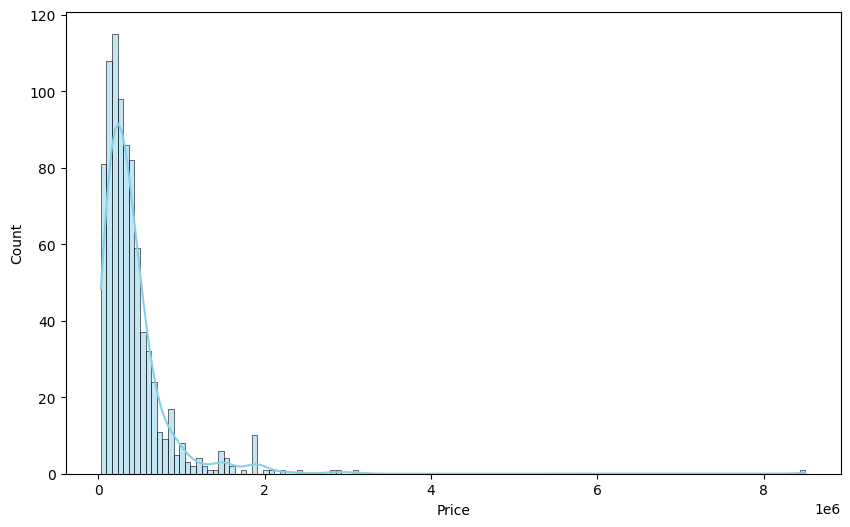

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Price'],color='skyblue',kde=True)

In [31]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [32]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [33]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [35]:
df=df[df['Price']<6000000]

In [38]:
df=df[df['kms_driven']<200000]

In [39]:
df.describe()

,year,Price,kms_driven
count,811.000000,8.110000e+02,811.000000
mean,2012.459926,4.019625e+05,45272.298397
std,3.989716,3.816371e+05,30668.740753
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56200.000000
max,2019.000000,3.100000e+06,195000.000000


<Axes: xlabel='Price', ylabel='Count'>

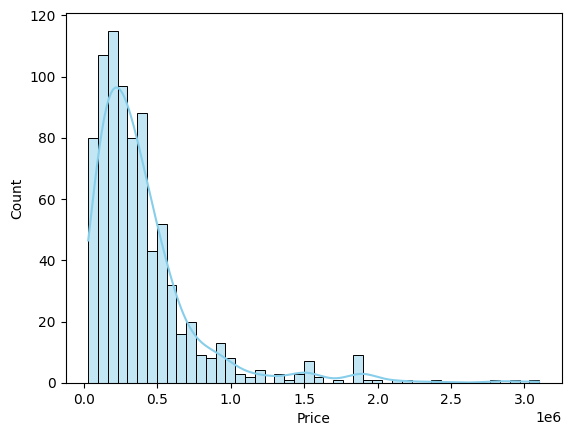

In [41]:
sns.histplot(data=df['Price'],color='skyblue',kde=True)

In [102]:
df.to_csv('data/clean_car_data.csv')

In [104]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [107]:
df[df['Price']>6000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [110]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3376\475026656.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


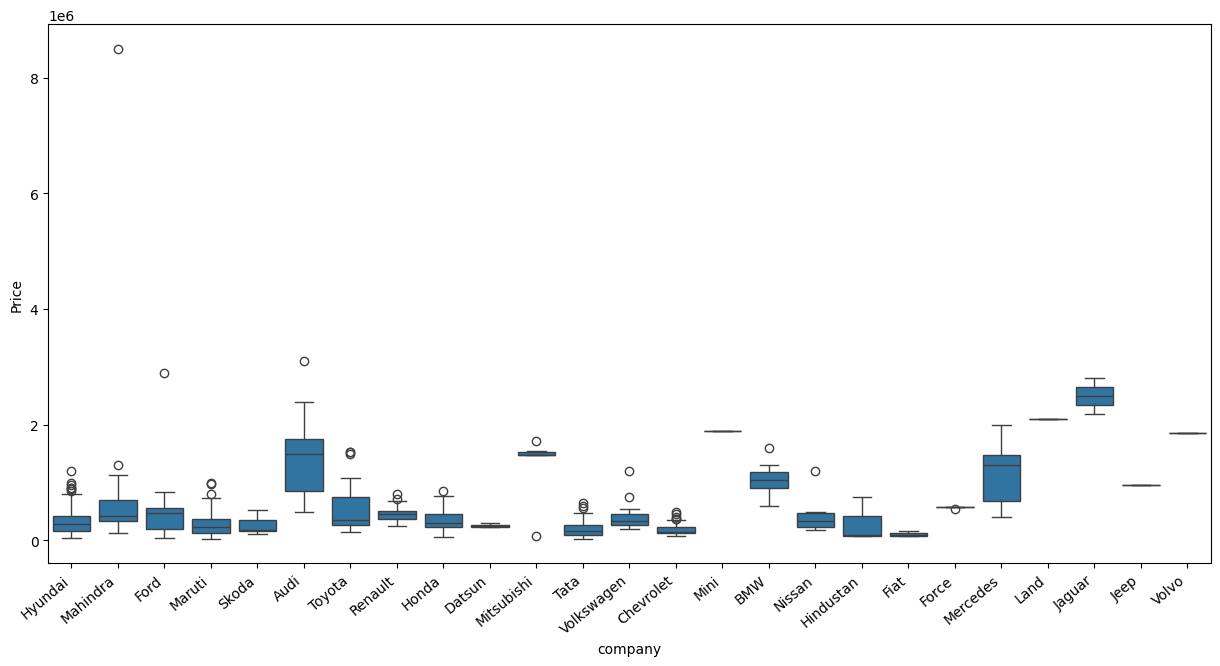

In [114]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<Axes: xlabel='kms_driven'>

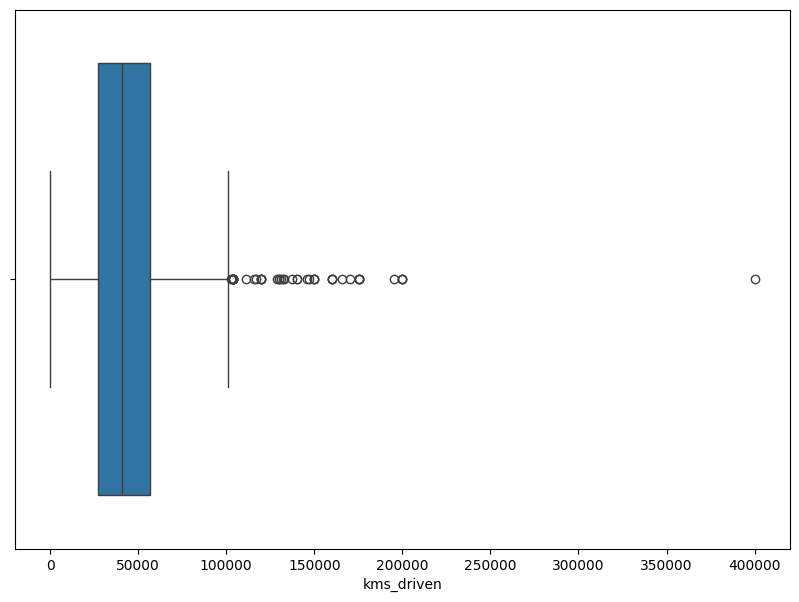

In [115]:
plt.figure(figsize=(10,7))
sns.boxplot(x='kms_driven',data=df)